# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [2]:
import pandas as pd
import seaborn as sb
import requests
import urllib.parse
import json
import time
import random as rand
from bs4 import BeautifulSoup

samples = 1000

In [ ]:
# Web Crawler

reserve = []
data = {
    'Article': [],
    'Image Count': [],
    'Emissions': []
}
baseURL = 'http://www.scholarpedia.org'

def getHTMLData(url):
    page = None
    
    while page == None:
        try:
            page = requests.get(url)
        except Exception as e:
            print(f' [ WEB CRAWLER ERROR ] - EXCEPTION WHEN GETTING HTML: {e}')
            url = pullNextReserve()
            if url == None:
                print(f'    [X] Reserve exhausted, terminating')
                break
            else:
                print(f'    [-] Moving to {url}')
                url = baseURL + url

        if page != None and page.status_code == 429:
            print(f'[ WEB CRAWLER DEBUG ] - Rate Limited, waiting 5 seconds...')
            time.sleep(5)
            page = None
        elif page != None and page.status_code != 200: # Handle exceptions not raised
            print(f'[ WEB CRAWLER ERROR ] - {url} data failed, code {page.status_code}.')
            url = pullNextReserve()
            if url == None:
                print(f'    [X] Reserve exhausted, terminating')
                break
            else:
                print(f'    [-] Moving to {url}')
                url = baseURL + url
            page = None

    return page

def getArticleData(url):
    # Get html 
    # ...requests the page, if denied then terminate the crawler
    # ...if failed, return error
    page = getHTMLData(url)

    if page == None:
        return None
    
    soup = BeautifulSoup(page.text, 'html.parser')

    # Scrape for links
    # ... isolate article links
    # ... check for compatibility (>3 Links)

    links = [
        link.get('href') for link in set(soup.find_all('a')) # Using the set method to avoid duplicates
        if link.get('href') 
        and '/article/' in link.get('href')
        and '#' not in link.get('href')
        and ':' not in link.get('href')
        and link.get('href') != '/wiki/Main_Page'
    ]

    # Scrape for images

    imageCount = len(soup.find_all('img'))

    return {
        'Article': url,
        'Image Count': imageCount,
        'Links': links
    }



    return emissionData['statistics']['co2']['grid']['grams'], emissionReq.status_code

def pullNextReserve():
    if len(reserve) == 0:
        return None
    
    retVal = reserve[0]
    del reserve[0]
    return retVal


# The Loop
nextLink = '/article/Main_Page' # the url which will be examined next

#print(getHTMLData("http://httpbin.org/status/401"))

#print(getEmissions('https://en.wikipedia.org/wiki/2022_UCI_Mountain_Bike_season'))

for i in range(samples):
    # Get the data from the site
    article_data = getArticleData(baseURL + nextLink)
    
    if article_data == None:
        break

    # Store data

    data['Article'].append(nextLink)
    data['Image Count'].append(article_data['Image Count'])
    data['Emissions'].append(-999)

    # Get the next available article
    # ... if none found, pull from reserve, exhaustion results in termination
    # ... if found, use the next link and then store the rest in reserve
    # ... if the link has already been used, pull from reserve

    if article_data['Links'][0] != None:
        chosenIndex = rand.randint(0, len(article_data['Links'])-1)
        nextLink = article_data['Links'][chosenIndex]

        while (nextLink in data['Article']):
            print(f'[ WEB CRAWLER DEBUG ] - {nextLink} used already, pulling from reserve')
            nextLink = pullNextReserve()

            if nextLink == None:
                print(f'    [X] Reserve exhausted, terminating')
                break
            else:
                print(f'    [-] Moving to {nextLink}')

        if nextLink == None: break


        if len(article_data['Links']) > 1:
            del article_data['Links'][chosenIndex]
            reserve.extend([article for article in article_data['Links'] if article not in reserve])

    else: # There's no links that was found in the article data
        print(f'[ WEB CRAWLER DEBUG ] - No links found for {nextLink}, pulling from reserve')
        nextLink = pullNextReserve()

        if nextLink == None:
            print(f'    [X] Reserve exhausted, terminating')
            break
        else:
            print(f'    [-] Moving to {nextLink}')

    print(f'Progress: {i+1}/{samples}')

data = pd.DataFrame(data)

data


Progress: 1/1000
Progress: 2/1000
[ WEB CRAWLER DEBUG ] - /article/Main_Page used already, pulling from reserve
    [-] Moving to /article/Real-time_data_analysis_in_particle_physics
Progress: 3/1000
Progress: 4/1000
[ WEB CRAWLER DEBUG ] - /article/Main_Page used already, pulling from reserve
    [-] Moving to /article/SuperSymmetry_and_the_LHC_Run_2
[ WEB CRAWLER DEBUG ] - /article/SuperSymmetry_and_the_LHC_Run_2 used already, pulling from reserve
    [-] Moving to /article/The_Top_quark_discovery
Progress: 5/1000
[ WEB CRAWLER DEBUG ] - /article/Main_Page used already, pulling from reserve
    [-] Moving to /article/SuperSymmetry_and_the_LHC_Run_2
[ WEB CRAWLER DEBUG ] - /article/SuperSymmetry_and_the_LHC_Run_2 used already, pulling from reserve
    [-] Moving to /article/Main_Page
[ WEB CRAWLER DEBUG ] - /article/Main_Page used already, pulling from reserve
    [-] Moving to /article/Real-time_data_analysis_in_particle_physics
[ WEB CRAWLER DEBUG ] - /article/Real-time_data_analysi

,Article,Image Count,Emissions
0,/article/Main_Page,38,-999
1,/article/SuperSymmetry_and_the_LHC_Run_2,26,-999
2,/article/Special_relativity,7,-999
3,/article/Real-time_data_analysis_in_particle_p...,14,-999
4,/article/Resonance,7,-999
...,...,...,...
995,/article/Brain_connectivity,10,-999
996,/article/Brain_Connectivity,10,-999
997,/article/Maintenance_of_synaptic_plasticity,14,-999
998,/article/Genesis,12,-999


In [7]:
# Get the emissions of each website
from concurrent.futures import ThreadPoolExecutor

def getEmissions(url, maxTries):
    # Get emission data

    emissionReq = None
    emissionData = None
    tries = 0

    while (emissionReq == None):
        try:
            emissionReq = requests.get(f'https://api.websitecarbon.com/site?url={urllib.parse.quote(url, safe="")}')
            emissionData = json.loads(emissionReq.text)['statistics']['co2']['grid']['grams']
        except Exception as e:
            print(f'[ EMISSIONS ERROR ] - Failed to get data for {url}: {e}')

        if emissionReq.status_code == 429: # Rate Limit
            print('[ EMISSIONS DEBUG ] - Rate Limited... waiting 5 seconds')
            time.sleep(5)
            emissionReq = None
        elif emissionReq.status_code != 200:
            print(f'[ EMISSIONS ERROR ] - Failed to get data for {url}, status code: {emissionReq.status_code}')
        
            if tries == maxTries:
                print(f'[ EMISSIONS FATAL ERROR ] - Tries exhausted for {url}')
                break
            else:
                emissionReq = None
                tries+=1


    return emissionData
    
# Function to handle each row of data
def process_row(row, baseURL, maxTries, data):
    article = data.loc[row, 'Article']
    emissions = getEmissions(baseURL + article, maxTries)
    if emissions is not None:
        data.loc[row, 'Emissions'] = emissions

    print(f"Finished Row: {row + 1}/{len(data)}")


data = pd.read_csv('finalish-data.csv')
data = data[data['Emissions'] < 0.0]

baseURL = 'http://www.scholarpedia.org'

data['Emissions'] = data['Emissions'].astype(float)
articles = data['Article']


# Set the maximum number of threads to use
max_threads = 10
maxTries = 5

print(data)

# Use ThreadPoolExecutor for multithreading
with ThreadPoolExecutor(max_workers=max_threads) as executor:
    # Submit tasks for each row (URL) to the thread pool
    for row in range(len(data)):
        executor.submit(process_row, row, baseURL, maxTries, data)

# Wait for all threads to complete
print("All threads completed.")

data



                                               Article  Image Count  Emissions
15                   /article/The_Top_quark_discovery,            7     -999.0
169                       /article/Language_(computer)            7     -999.0
181                  /article/C_(programming_language)            8     -999.0
334              /article/Enteric_(gut)_nervous_system           10     -999.0
339   /article/Perturbation_theory_(dynamical_systems)           12     -999.0
348             /article/NEST_(NEural_Simulation_Tool)           14     -999.0
354          /article/GENESIS_(simulation_environment)           12     -999.0
525                    /article/Language_(linguistics)            8     -999.0
786      /article/Path_integral_(mathematical_physics)            8     -999.0
787        /article/Coherent_state_(quantum_mechanics)            8     -999.0
790        /article/Coherent_state_(Quantum_mechanics)            8     -999.0
830   /article/Perturbation_Theory_(dynamical_system

,Article,Image Count,Emissions
15,"/article/The_Top_quark_discovery,",7,-999.0
169,/article/Language_(computer),7,-999.0
181,/article/C_(programming_language),8,-999.0
334,/article/Enteric_(gut)_nervous_system,10,-999.0
339,/article/Perturbation_theory_(dynamical_systems),12,-999.0
348,/article/NEST_(NEural_Simulation_Tool),14,-999.0
354,/article/GENESIS_(simulation_environment),12,-999.0
525,/article/Language_(linguistics),8,-999.0
786,/article/Path_integral_(mathematical_physics),8,-999.0
787,/article/Coherent_state_(quantum_mechanics),8,-999.0


In [3]:
# This finishes the data that for some reason the emissions api couldnt get
data = pd.read_csv('finalish-data.csv')
missingData = data[data['Emissions'] < 0.0]
baseURL = 'http://www.scholarpedia.org'

# Define the API endpoint
url = "https://backend.websiteemissions.com/api/carbonCalculator/co2/calculateCarbonForSingleUrl"

# Prepare the payload
payload = {
    "url": "https://example.com",  # Replace with the URL you want to calculate emissions for
}

# Prepare headers if required (e.g., content type)
headers = {
    "Content-Type": "application/json",  # Ensure proper content type
    # Add other headers if required by the API, such as API keys or authentication tokens
}




i = 0
for row in missingData.itertuples(index=True):
    data.loc[row.Index, 'Emissions'] = json.loads(requests.post(url, json = {'url':baseURL+row.Article}, headers=headers).text)["co2js_emission_val"]
    print(f"Progress: {i}/{len(missingData)}")
    i+=1

data
   

Progress: 0/17
Progress: 1/17
Progress: 2/17
Progress: 3/17
Progress: 4/17
Progress: 5/17
Progress: 6/17
Progress: 7/17
Progress: 8/17
Progress: 9/17
Progress: 10/17
Progress: 11/17
Progress: 12/17
Progress: 13/17
Progress: 14/17
Progress: 15/17
Progress: 16/17


,Article,Image Count,Emissions
0,/article/Main_Page,38,0.220036
1,/article/SuperSymmetry_and_the_LHC_Run_2,26,0.360126
2,/article/Special_relativity,7,0.076990
3,/article/Real-time_data_analysis_in_particle_p...,14,0.214382
4,/article/Resonance,7,0.076969
...,...,...,...
995,/article/Brain_connectivity,10,0.153414
996,/article/Brain_Connectivity,10,0.153212
997,/article/Maintenance_of_synaptic_plasticity,14,0.147721
998,/article/Genesis,12,0.194232


# My Question

### If a randomly chosen page emits more than the mean of CO₂, what is the probability that it has more images than the mean of images on an article?

# My Analysis

In [11]:
import pandas as pd
import seaborn as sb

data = pd.read_csv('final-data.csv')

In [5]:
# Calculate the mean of the emissions and the images
images_mean = data['Image Count'].mean()
emission_mean = data['Emissions'].mean()

print(f"Images Mean: {images_mean}\nEmission Mean: {emission_mean}")

Images Mean: 14.03
Emission Mean: 0.20583947997087637


<Axes: xlabel='Emissions', ylabel='Image Count'>

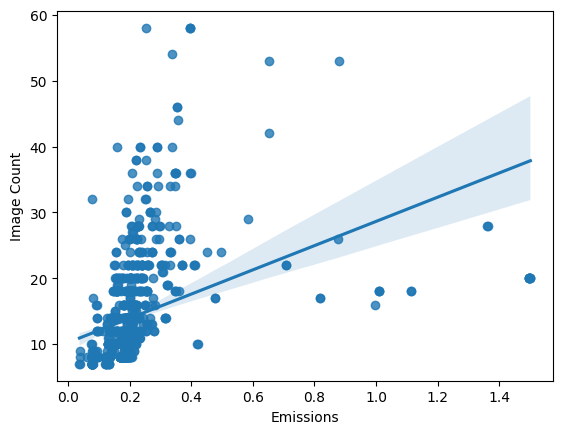

In [8]:
# Use a scatterplot to identify their correlation
sb.regplot(data=data, x=data['Emissions'], y=data['Image Count'])

In [10]:
# Calculate the Pearson Correlation Coefficient
correlation = data['Emissions'].corr(data['Image Count'])
print(f'The pearson correlation coefficient for Emissions and image count is {correlation}')

The pearson correlation coefficient for Emissions and image count is 0.3944904428864301


In [23]:
# Get the theoretical probability that an article emits more mean co2 and has more mean images
conditional_df = data[(data['Emissions'] > emission_mean) & (data['Image Count'] > images_mean)]

print(f"The theoretical probability that an article emits more mean co2 and has more mean images is: {len(conditional_df)}/{len(data)} or {(len(conditional_df)/len(data))*100}%")


The theoretical probability that an article emits more mean co2 and has more mean images is: 219/1000 or 21.9%


In [24]:
# Calculate Bayes Theorem
# ... Event A: > Mean of images
# ... Event B: > Mean of emissions

eventA = len(data[data['Image Count'] > images_mean])/1000
eventB = len(data[data['Emissions'] > emission_mean])/1000
BlA = len(conditional_df)/1000 # B Given a is true
BnotA = len(data[(data['Emissions'] > emission_mean) & (data['Image Count'] < images_mean)])/1000

bayes = (BlA * eventA)/eventB

print(f"The probability that a randomly chosen article emits more than the mean co2 and has more than the mean images is {bayes*100}%")


The probability that a randomly chosen article emits more than the mean co2 and has more than the mean images is 25.251245551601425%


# My Answer

While the correlation between carbon dioxide emission and image count of an article is low (0.394 on the Pearson correlation scale), the probability that a randomly chosen article that emits more than the mean of CO2 and has more images than the mean of images among a dataset of 1000 articles is approximately 25.3%. This was answered by gathering the amount of images and emissions of 1000 articles from Scolarpedia using web crawling (for article discovery), web scraping (for article discovery and getting the amount of images), and utilizing the Website Carbon Calculator API (to calculate the emissions from said article). I then utilized the data to determine the mean, which states the average amount of images in an article is 14.03 images, and the average amount of carbon dioxide emissions is 0.205 grams. I then used a scatterplot and the Pearson correlation coefficient to determine the correlation between the amount of images and the amount of emissions in the article; the scatterplot showed a weak, non-linear relationship, and the Pearson correlation coefficient came out to 0.3944, which demonstrates a rather weak relationship. Despite this, however, the theoretical probability that a randomly chosen article has more than the mean of images and emissions is 21.9% (219 articles out of the 1000); this was reflected when applied to Bayes theorem that came out to 25.3%.

Hence, the probability that a randomly chosen article has more images and emissions than the means of both is 25.3%, granted a weak relationship between the two factors.